In [1]:
# Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lcs = pd.read_csv(r"C:\LendingCaseStudy\loan.csv")
lcs.shape

C:\Users\vasu\AppData\Local\Temp\ipykernel_15592\3446323486.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lcs = pd.read_csv(r"C:\LendingCaseStudy\loan.csv")


(39717, 111)

In [3]:
print('Number of empty Columns:')
print(lcs.isnull().all(axis=0).sum())

Number of empty Columns:
54


In [4]:
lcs.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Remove Null values from data


In [5]:
lcs.dropna(axis = 1, how = 'all', inplace = True)
lcs.shape

(39717, 57)

In [6]:
lcs.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
lcs.drop(["initial_list_status","mths_since_last_record", "next_pymnt_d"], axis = 1, inplace = True)
lcs.shape

(39717, 54)

In [8]:
lcs.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# Drop additional columns we don't need these as these are mostly nulls.
lcs.drop(['pymnt_plan','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)


In [10]:
lcs.shape

(39717, 46)

In [11]:
lcs.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'chargeoff_within_12_mths'],
      dtype='object')

In [12]:
#drop more columns which does not contribute towards loan data analysis
lcs.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", 
          "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
            "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", 
            "chargeoff_within_12_mths"], axis = 1, inplace = True)
lcs.shape

(39717, 23)

In [13]:
lcs.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'dti', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [14]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
lcs['int_rate'] = lcs['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
lcs['revol_util'] = lcs['revol_util'].str.rstrip('%')

In [15]:
# Lets take a look on important variable loan status in total loans issued

(lcs.loan_status.value_counts()*100)/len(lcs)

# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [16]:
# Lets take a look on important variable purpose of loan in total loans issued

(lcs.purpose.value_counts()*100)/len(lcs)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Derive Columns For Analysis

In [17]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

lcs.issue_d = pd.to_datetime(lcs.issue_d, format='%b-%y')
lcs['year']=lcs['issue_d'].dt.year
lcs['month']=lcs['issue_d'].dt.month

In [18]:
lcs.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,year,month
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,27.65,Jan-85,1,NaN,3,0,83.70,9,2011,12
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,1.00,Apr-99,5,NaN,3,0,9.40,4,2011,12


Univariate Analysis

In [19]:
# Basic statistics with .describe() - Quantitative Variables
lcs['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

c:\Users\vasu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

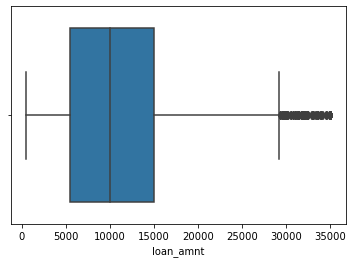

In [20]:
sns.boxplot(lcs.loan_amnt)

In [21]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(lcs['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

lcs = lcs[lcs["annual_inc"] < lcs["annual_inc"].quantile(0.90)]

print('After Removal of Outliers :')
print(lcs["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before Removal of Outliers :

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     35740.000000
mean      57387.003107
std       23644.470090
min        4000.000000
25%       39996.000000
50%       54996.000000
75%       74000.000000
max      115956.000000
Name: annual_inc, dtype: float64


c:\Users\vasu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

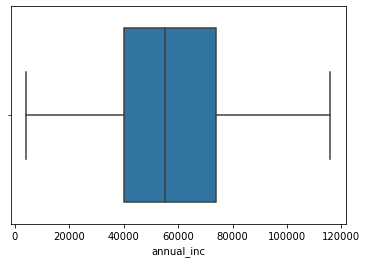

In [22]:
sns.boxplot(lcs.annual_inc)

In [23]:
# Basic statistics with .describe() -Quantitative Variables

lcs['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate zoom'ed to 25% from 15%.

count     35740
unique      369
top       10.99
freq        852
Name: int_rate, dtype: object

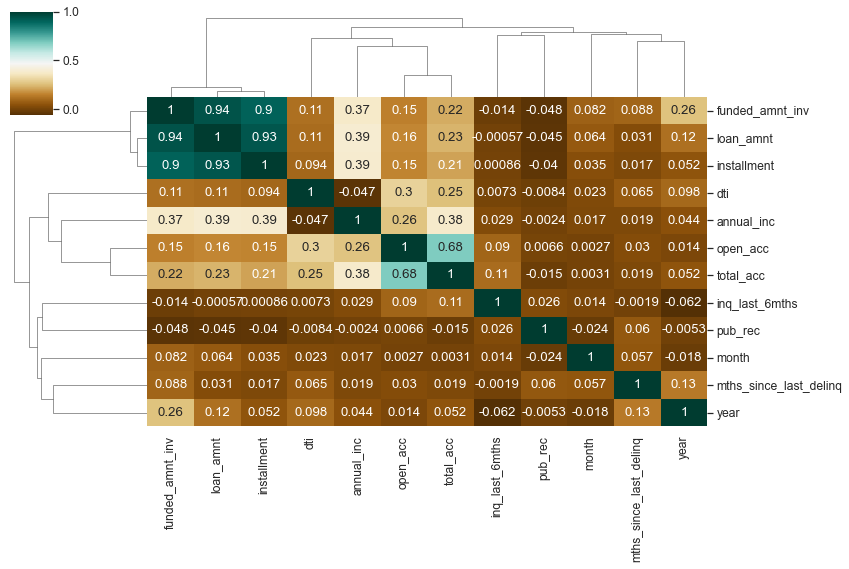

In [24]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = lcs.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()


In [25]:
lcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35740 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               35740 non-null  int64         
 1   funded_amnt_inv         35740 non-null  float64       
 2   term                    35740 non-null  object        
 3   int_rate                35740 non-null  object        
 4   installment             35740 non-null  float64       
 5   grade                   35740 non-null  object        
 6   sub_grade               35740 non-null  object        
 7   emp_length              34700 non-null  object        
 8   home_ownership          35740 non-null  object        
 9   annual_inc              35740 non-null  float64       
 10  verification_status     35740 non-null  object        
 11  issue_d                 35740 non-null  datetime64[ns]
 12  loan_status             35740 non-null  object

In [26]:
print("Mode : " + lcs.emp_length.mode()[0])
lcs.emp_length.value_counts()

Mode : 10+ years


10+ years    7596
< 1 year     4195
2 years      4024
3 years      3703
4 years      3145
1 year       2986
5 years      2985
6 years      2029
7 years      1623
8 years      1301
9 years      1113
Name: emp_length, dtype: int64

## The above value counts shows that the mode value has far higher frequency than that of the next most frequent value. <br>
 This means that we can safely assign the value of mode to the null values in the column.<br>
 Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.<br>

In [27]:
lcs.emp_length.fillna(lcs.emp_length.mode()[0], inplace = True)
lcs.emp_length.isna().sum()

0

In [28]:
lcs.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
lcs.revol_util.isna().sum()

0

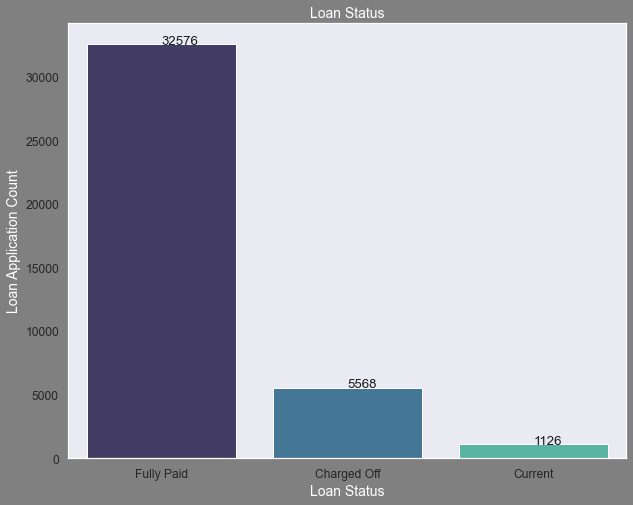

In [29]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='gray')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=lcs,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=lcs['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

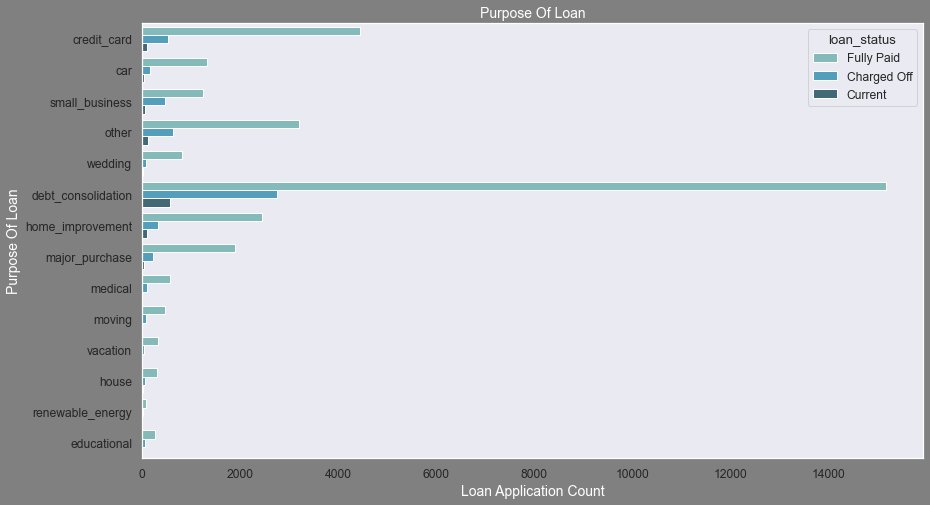

In [30]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='gray')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=lcs,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

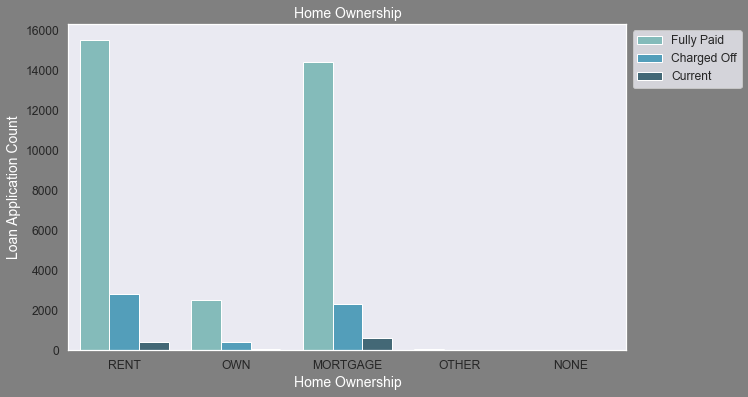

In [31]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='gray')
ax = sns.countplot(x="home_ownership",data=lcs,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

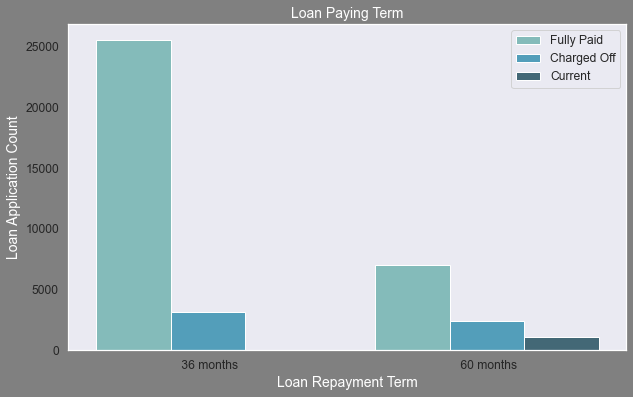

In [32]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='grey')
ax = sns.countplot(x="term",data=lcs,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

## Bivariate Analysis

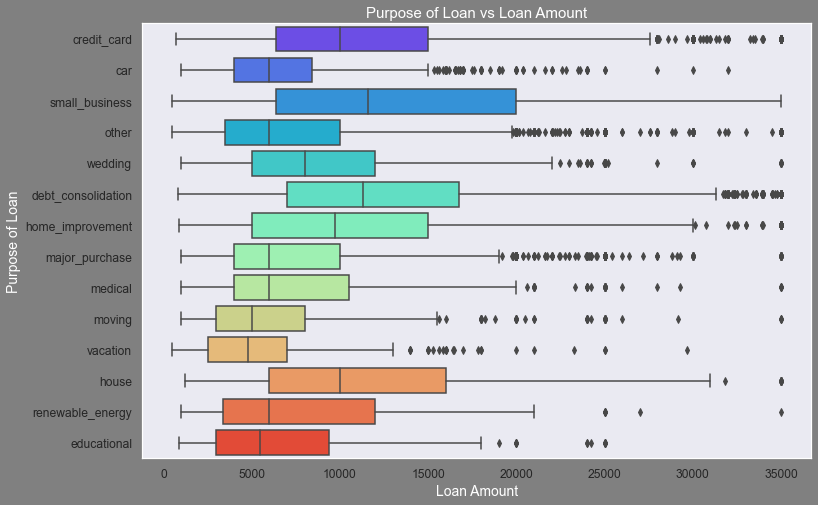

In [33]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='gray')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =lcs,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

In [38]:
lcs.revol_util = pd.to_numeric(lcs.revol_util.apply(lambda x : x.split('%')[0]))
lcs.int_rate = pd.to_numeric(lcs.int_rate.apply(lambda x : x.split('%')[0]))
lcs.emp_length = pd.to_numeric(lcs.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

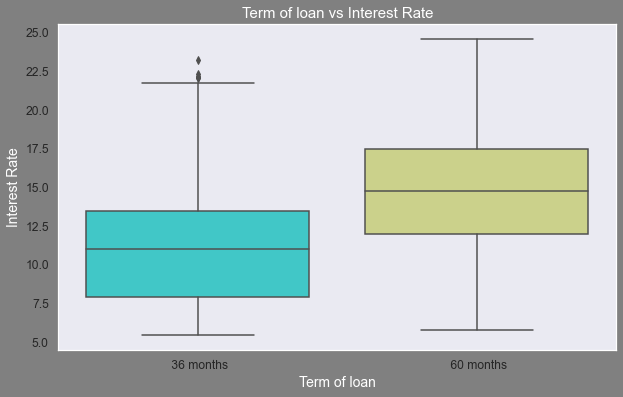

In [39]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='gray')
ax = sns.boxplot(y='int_rate', x='term', data =lcs,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

In [40]:
#creating bins for int_rate,open_acc,revol_util,total_acc
lcs['int_rate_groups'] = pd.cut(lcs['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
lcs['open_acc_groups'] = pd.cut(lcs['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
lcs['revol_util_groups'] = pd.cut(lcs['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
lcs['total_acc_groups'] = pd.cut(lcs['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
lcs['annual_inc_groups'] = pd.cut(lcs['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [41]:
# View creeated bins
lcs.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,year,month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,0,83.7,9,2011,12,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,0,9.4,4,2011,12,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,0,98.5,10,2011,12,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,0,21.0,37,2011,12,13%-17%,2-10,20-40,20-37,3k-31k
4,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,...,0,53.9,38,2011,12,9%-13%,10-19,40-60,37-55,31k-58k


<AxesSubplot:xlabel='emp_length', ylabel='count'>

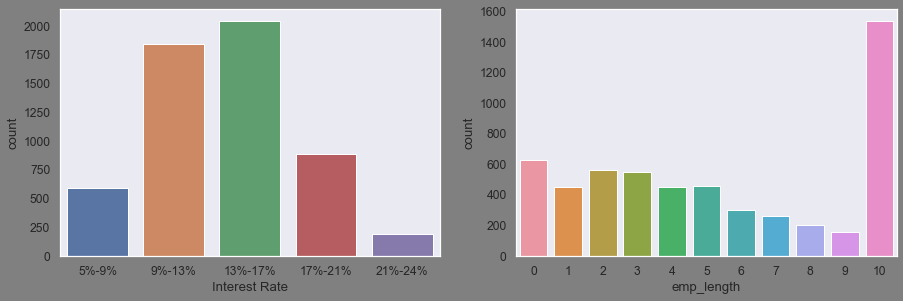

In [42]:
fig, ax = plt.subplots(figsize = (15,10), facecolor='gray')
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=lcs[lcs.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=lcs[lcs.loan_status == 'Charged Off'])

In [43]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = lcs.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,97,17,190,304,0.319079
5,F,309,71,639,1019,0.303238
4,E,700,176,1899,2775,0.252252
3,D,1109,216,3904,5229,0.212086
2,C,1338,262,6401,8001,0.167229
1,B,1414,344,10166,11924,0.118584
0,A,601,40,9377,10018,0.059992


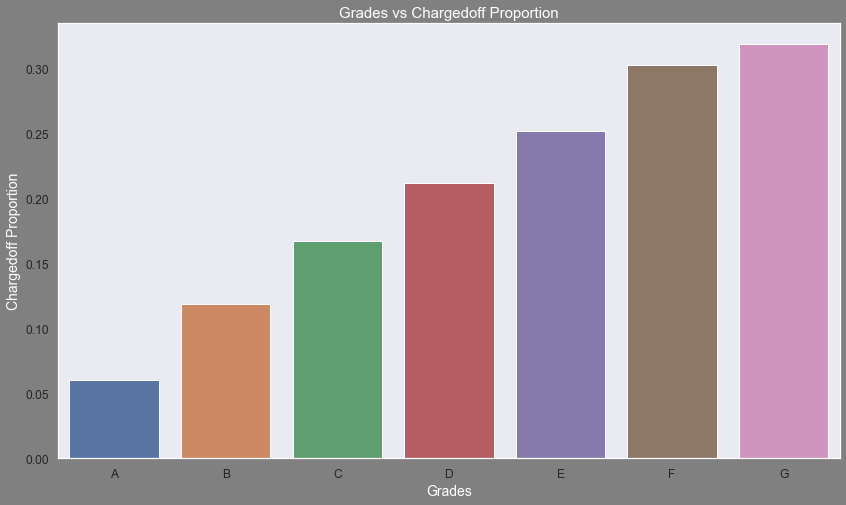

In [44]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='gray')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [45]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = lcs.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,53.0,4.0,55.0,112.0,0.473214
32,G3,19.0,3.0,25.0,47.0,0.404255
31,G2,26.0,1.0,47.0,74.0,0.351351
34,G5,10.0,1.0,18.0,29.0,0.344828
28,F4,51.0,17.0,94.0,162.0,0.314815
30,G1,30.0,10.0,61.0,101.0,0.297030
23,E4,126.0,28.0,293.0,447.0,0.281879
27,F3,50.0,11.0,118.0,179.0,0.279330
25,F1,88.0,23.0,210.0,321.0,0.274143
26,F2,67.0,16.0,162.0,245.0,0.273469


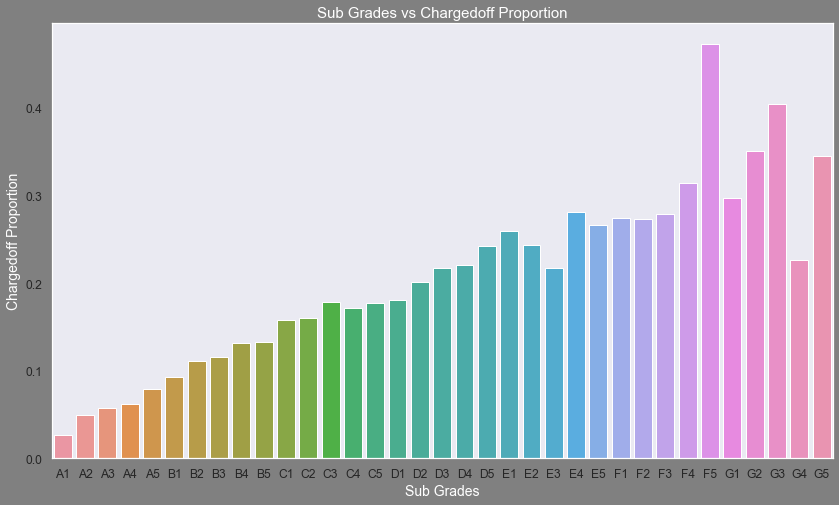

In [46]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='gray')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

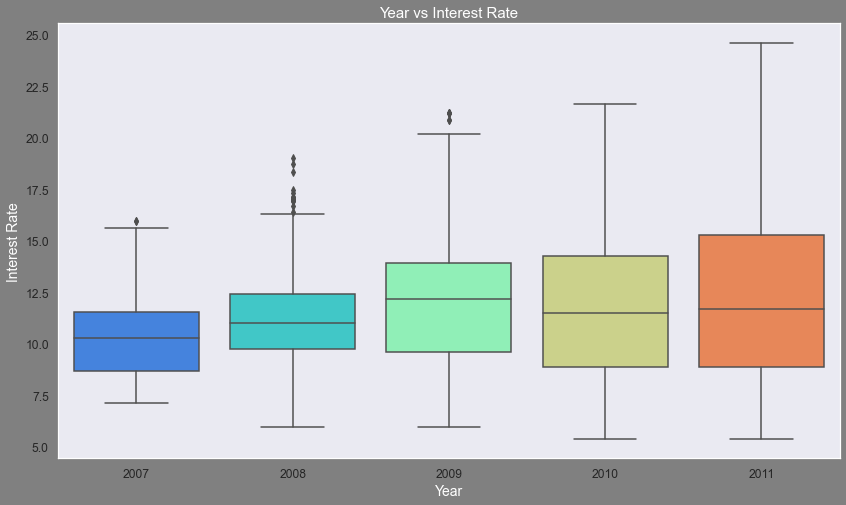

In [47]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='gray')
ax = sns.boxplot(y='int_rate', x='year', data =lcs,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

## Analysing annual income with other columns for more insights 

#### 1.Annual income vs loan purpose

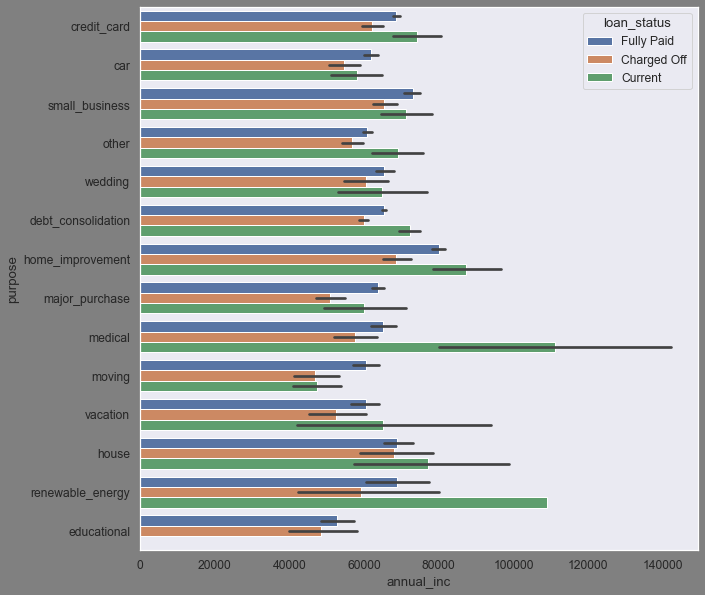

In [49]:
plt.figure(figsize=(10,10), facecolor='gray')
sns.barplot(data =lcs,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### 2.Annual income vs home ownership

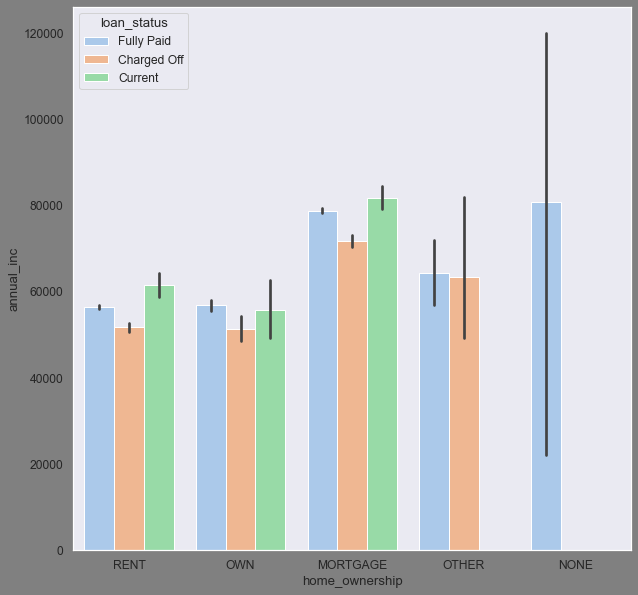

In [50]:
plt.figure(figsize=(10,10) , facecolor='gray')
sns.barplot(data =lcs,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### 3. Annual income vs int_rate

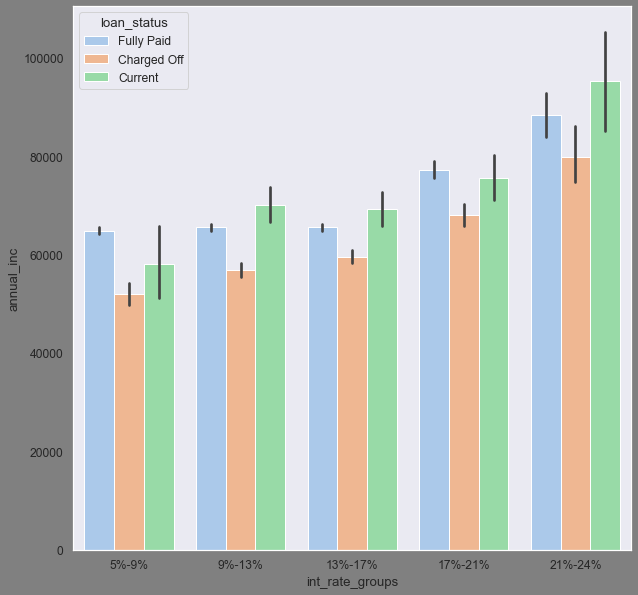

In [51]:
plt.figure(figsize=(10,10), facecolor = 'grey')
sns.barplot(data =lcs,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan vs Loan Purpose

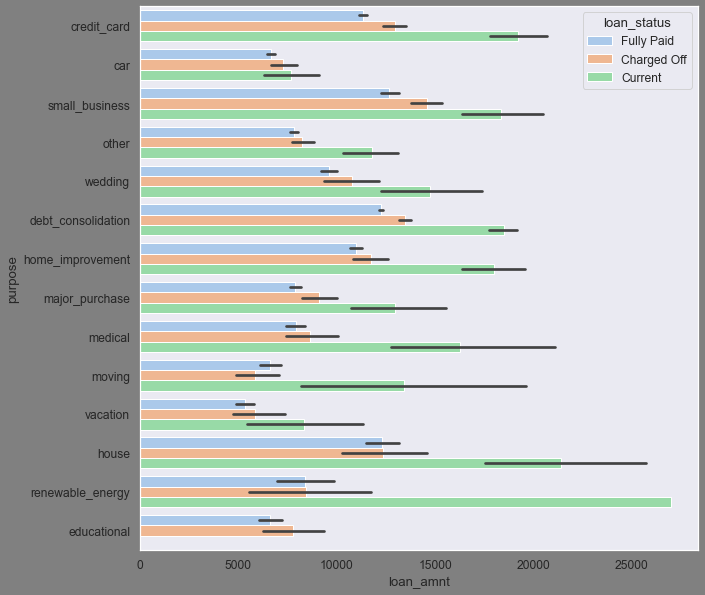

In [53]:
plt.figure(figsize=(10,10), facecolor = 'grey')
sns.barplot(data =lcs,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### 2.Loan amount vs Grade

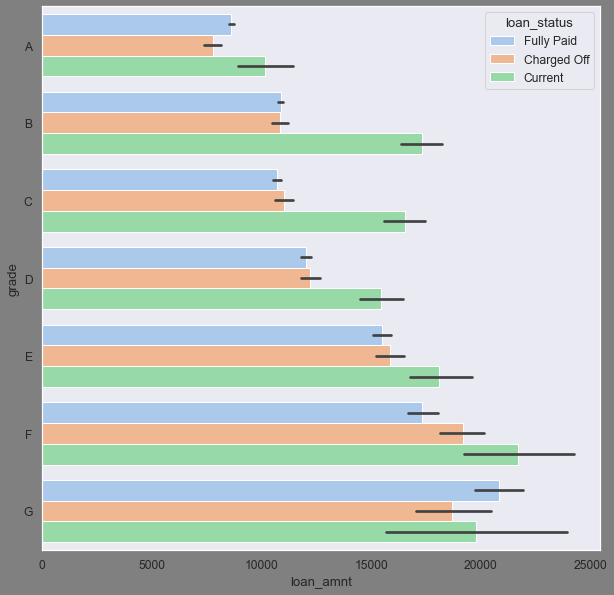

In [55]:
plt.figure(figsize=(10,10), facecolor ='gray')
sns.barplot(data =lcs,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

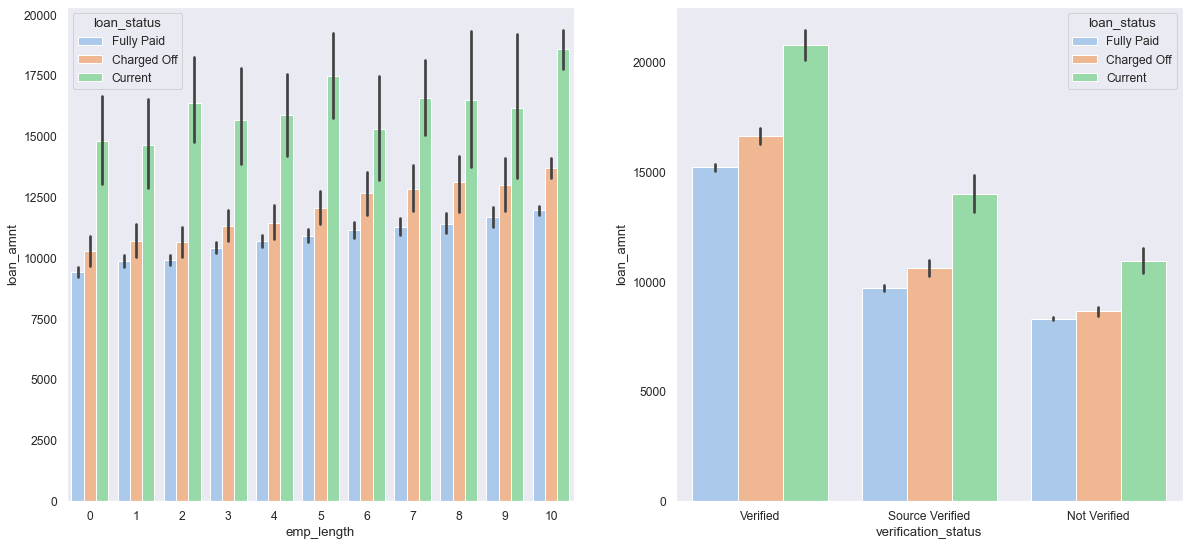

In [56]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =lcs,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =lcs,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

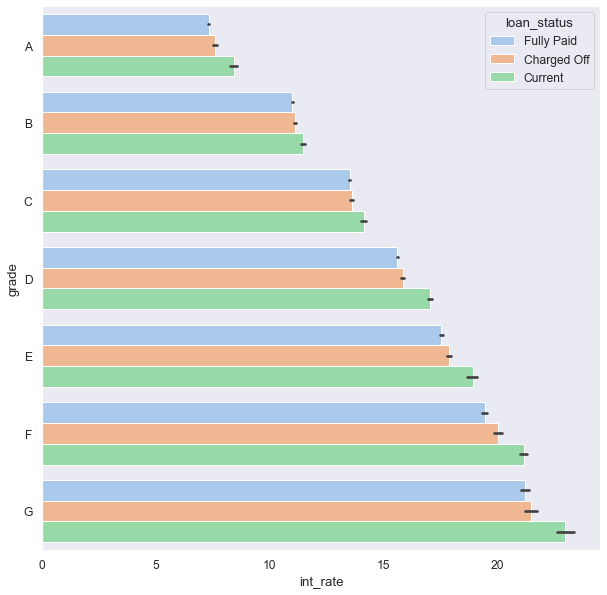

In [57]:
#Grade vs Intrest rate
plt.figure(figsize=(10,10))
sns.barplot(data =lcs,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%